# Project: Machine-Learning-Algorithms-On-Iris-Dataset
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.
It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.
Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. 

# Getting Started

# 1.Load The Data
I am going to use iris flowers dataset.
The dataset contains 150 observations of iris flowers.
There are four columns of measurements of the flowers in centimeters.
The fifth column is the species of the flower observed. 
All observed flowers belong to one of three species.

# 1.1 Import Libraries
I am going to load the iris data from CSV file URL.
First,let’s import all of the modules, functions and objects I am going to use in this Project.


In [1]:
# Loading libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 1.2 Loading DataSet
I can load the data directly from the UCI Machine Learning repository.

I am using pandas to load the data. I will also use pandas next to explore the data both with descriptive statistics and data visualization.

Note that I am specifying the names of each column when loading the data.

In [2]:
# Loading dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

# 2.0 Summarizing the Dataset
In this step I am going to take a look at the data a few different ways:
1.Dimensions of the dataset.
2.Peek at the data itself.
3.Statistical summary of all attributes.
4.Breakdown of the data by the class variable.

# 2.1 Dimensions of Dataset
I can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [4]:
# shape
print(dataset.shape)

(150, 5)


# 2.2 Peek at the Data


In [6]:
# head
print(dataset.head(120))

     sepal-length  sepal-width  petal-length  petal-width            class
0             5.1          3.5           1.4          0.2      Iris-setosa
1             4.9          3.0           1.4          0.2      Iris-setosa
2             4.7          3.2           1.3          0.2      Iris-setosa
3             4.6          3.1           1.5          0.2      Iris-setosa
4             5.0          3.6           1.4          0.2      Iris-setosa
5             5.4          3.9           1.7          0.4      Iris-setosa
6             4.6          3.4           1.4          0.3      Iris-setosa
7             5.0          3.4           1.5          0.2      Iris-setosa
8             4.4          2.9           1.4          0.2      Iris-setosa
9             4.9          3.1           1.5          0.1      Iris-setosa
10            5.4          3.7           1.5          0.2      Iris-setosa
11            4.8          3.4           1.6          0.2      Iris-setosa
12            4.8        

# 2.3 Statistical Summary
Now I can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [7]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


I can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

# 2.4  Class Distribution
Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [8]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


We can see that each class has the same number of instances (50 or 33% of the dataset).

# 3.0 Data Visualization
I now have a basic idea about the data. I need to extend that with some visualizations.

I am  going to look at two types of plots:

# 1.Univariate plots to better understand each attribute.
# 2.Multivariate plots to better understand the relationships between attributes

# 3.1 Univariate Plots
I start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, I can create box and whisker plots of each.

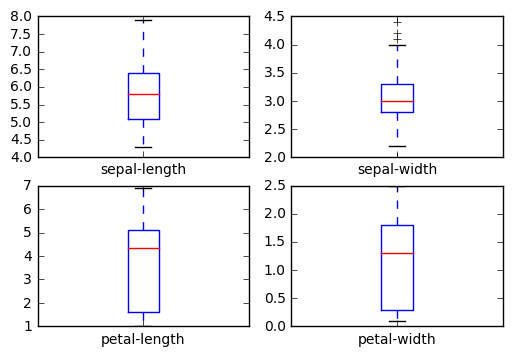

In [9]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

We can also create a histogram of each input variable to get an idea of the distribution.


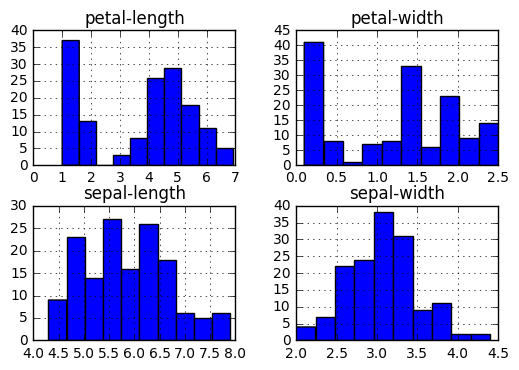

In [10]:
# histograms
dataset.hist()
plt.show()

# 3.2 Multivariate Plots
Now I can look at the interactions between the variables.

First let’s look at scatterplots of all pairs of attributes.
This can be helpful to spot structured relationships between input variables.

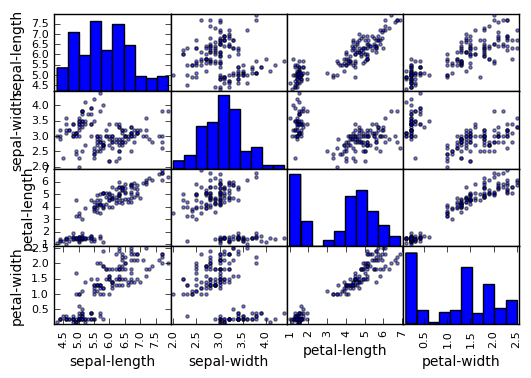

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

# 4.0 Evaluating Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Now I am going to do the following :-
# 1.Separate out a validation dataset.
# 2.Set-up the test harness to use 10-fold cross validation.
# 3.Build 5 different models to predict species from flower measurements
# 4.Select the best model.

# 4.1 Create a Validation Dataset
I need to know that the model I created is any good.

Later, I will use statistical methods to estimate the accuracy of the models that I  create on unseen data. I also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, I am going to hold back some data that the algorithms will not get to see and I will use this data to get a second and independent idea of how accurate the best model might actually be.

I  will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)

I now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

# 4.2  Test Harness
I will use 10-fold cross validation to estimate accuracy.

This will split my dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [13]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

I am using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). I will be using the scoring variable when I run build and evaluate each model next.

# 4.3 Build Models 
I don’t know which algorithms would be good on this problem or what configurations to use. I get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so I am expecting generally good results.

Let’s evaluate 6 different algorithms:

# 1.Logistic Regression (LR)
# 2.Linear Discriminant Analysis (LDA)
# 3.K-Nearest Neighbors (KNN).
# 4.Classification and Regression Trees (CART).
# 5.Gaussian Naive Bayes (NB).
# 6.Support Vector Machines (SVM).
This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. 
I reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let’s build and evaluate our five models:

In [14]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
 cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


We now have 6 models and accuracy estimations for each. I need to compare the models to each other and select the most accurate.

Running the example above, I get the above raw results:--
I can see that it looks like KNN has the largest estimated accuracy score.

I can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

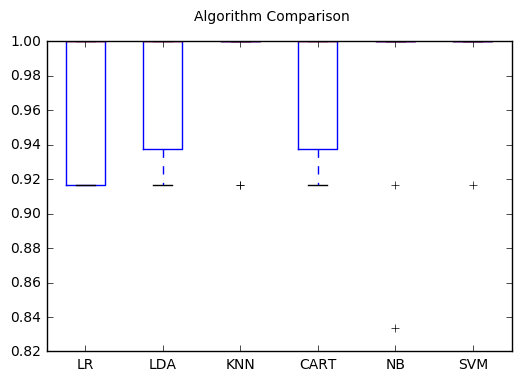

In [15]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 5.0  Make Predictions
The KNN algorithm was the most accurate model that I tested. Now I want to get an idea of the accuracy of the model on our validation set.

This will give me an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case I made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

I can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report..

In [16]:
# Making predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
Iris-virginica       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30



# CONCLUSION
 I can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).